# BINARY CLASSIFICATION WITH PYCARET. #

In [4]:
!pip install pycaret

  Using cached pycaret-3.3.0-py3-none-any.whl (485 kB)
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached pyod-1.1.3.tar.gz (160 kB)
  Preparing metadata (setup.py) ... done
  Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl (81 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached xxhash-3.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (194 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
  Using cached schemdraw-0.15-py3-none-any.whl (106 kB)
  Using cached plotly_resampler-0.9.2-py3-none-any.whl (81 kB)
  Using cached sktime-0.27.0-py3-none-any.whl (21.9 MB)
  Using cached tbats-1.1.3-py3-none-any.whl (44 kB)
  Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86

In [6]:
# Import and version verification
import pycaret
pycaret.__version__

'3.3.0'

In [11]:
from pycaret.datasets import get_data
# get_data load the dataset and displays it at the sametime.
c_data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# import pycaret and initialise the setup.
# When set use_gpu to True , its output the gpu misc infos.
from pycaret.classification import *
s = setup(data=c_data,target='Class variable',session_id='123')

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [33]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.6370
ridge,Ridge Classifier,0.7670,0.0000,0.5497,0.7235,0.6221,0.4581,0.4690,0.0310
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0520
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.2240
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0360
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.2310
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.1330
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.1940
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0360
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.2310


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Interpreting a confusion matrix involves analyzing the values within the matrix to gain insights into the performance of a classification model. Here's a step-by-step guide on how to interpret a confusion matrix:

Step 1: Understand the Layout:
- The confusion matrix is a square matrix with dimensions equal to the number of classes in your classification problem.
- The rows represent the actual or true labels, and the columns represent the predicted labels.

Step 2: Identify the Classes:
- Each row and column in the confusion matrix corresponds to a specific class in your classification problem.
- Note the class labels associated with each row and column.

Step 3: Evaluate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN):
- True Positives (TP): The number of instances correctly predicted as positive.
- True Negatives (TN): The number of instances correctly predicted as negative.
- False Positives (FP): The number of instances incorrectly predicted as positive (Type I error).
- False Negatives (FN): The number of instances incorrectly predicted as negative (Type II error).

Step 4: Calculate Evaluation Metrics:
- Use the values in the confusion matrix to calculate various evaluation metrics, such as accuracy, precision, recall (sensitivity), specificity, and F1-score.
- Evaluation metrics provide insights into the model's performance, strengths, and weaknesses.

Step 5: Analyze the Results:
- Analyze the confusion matrix to understand how the model is performing for each class.
- Look for patterns or discrepancies in the counts of TP, TN, FP, and FN.
- Pay attention to classes where the model has high false positive or false negative rates.
- Identify any imbalances in the model's predictions across different classes.

Step 6: Make Decisions and Adjustments:
- Based on the interpretation of the confusion matrix, make decisions to improve the model's performance.
- Consider adjusting the model's threshold for classification.
- Explore techniques like class weighting, resampling, or feature engineering to address imbalances or improve predictions for specific classes.

Interpreting a confusion matrix allows you to gain insights into the strengths and weaknesses of your classification model and make informed decisions to enhance its performance.

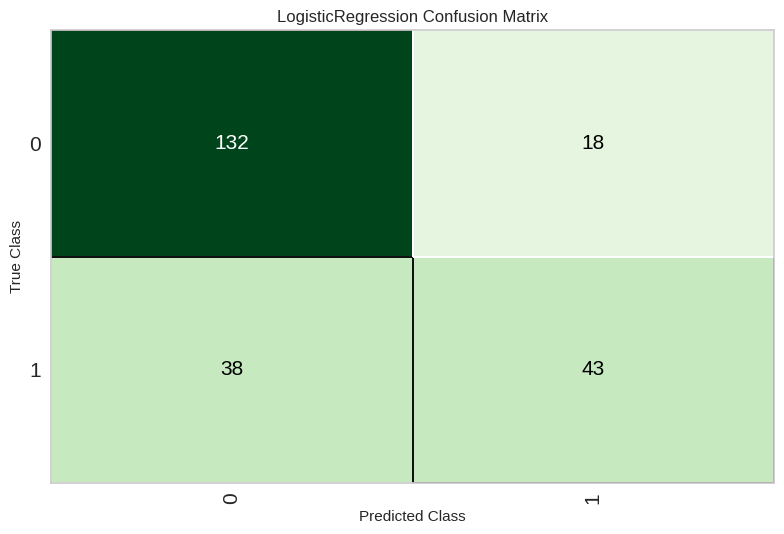

In [18]:
# Plot confusion matrix for this model.
# The confusion matrix allow to identify TP(true positive) , TN(true  negative) , FP (False positive ) and FN(False negative).

plot_model(best , plot='confusion_matrix')

AUC (Area Under the ROC Curve) is a commonly used evaluation metric for logistic regression and other binary classification models. The ROC (Receiver Operating Characteristic) curve is a graphical representation of the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) as the classification threshold is varied.

In logistic regression, the model assigns a probability to each instance indicating the likelihood of it belonging to the positive class. By adjusting the classification threshold, you can control the balance between true positives and false positives. The ROC curve plots this trade-off for different threshold values.

The AUC represents the area under the ROC curve. It provides a single scalar value that summarizes the overall performance of the logistic regression model. The AUC value ranges from 0 to 1, where a higher value indicates better predictive performance.

Interpreting the AUC score:
- AUC = 1: Perfect classifier that achieves a perfect trade-off between true positive rate and false positive rate.
- AUC = 0.5: Random classifier that predicts class labels randomly, indicating no discrimination power between the positive and negative classes.
- AUC > 0.5: Better-than-random classifier that exhibits some discrimination ability between the classes. The higher the AUC value, the better the discrimination power.

The AUC is a useful metric because it is not affected by the choice of the classification threshold, making it suitable for comparing different models or evaluating the performance of a model across different threshold settings. It provides a holistic view of the model's ability to correctly rank instances from different classes.

When using logistic regression, maximizing the AUC value is often an objective, as it corresponds to maximizing the model's discriminatory power and overall predictive performance. However, it is important to consider other evaluation metrics, such as accuracy, precision, and recall, in conjunction with the AUC to have a comprehensive understanding of the model's performance.

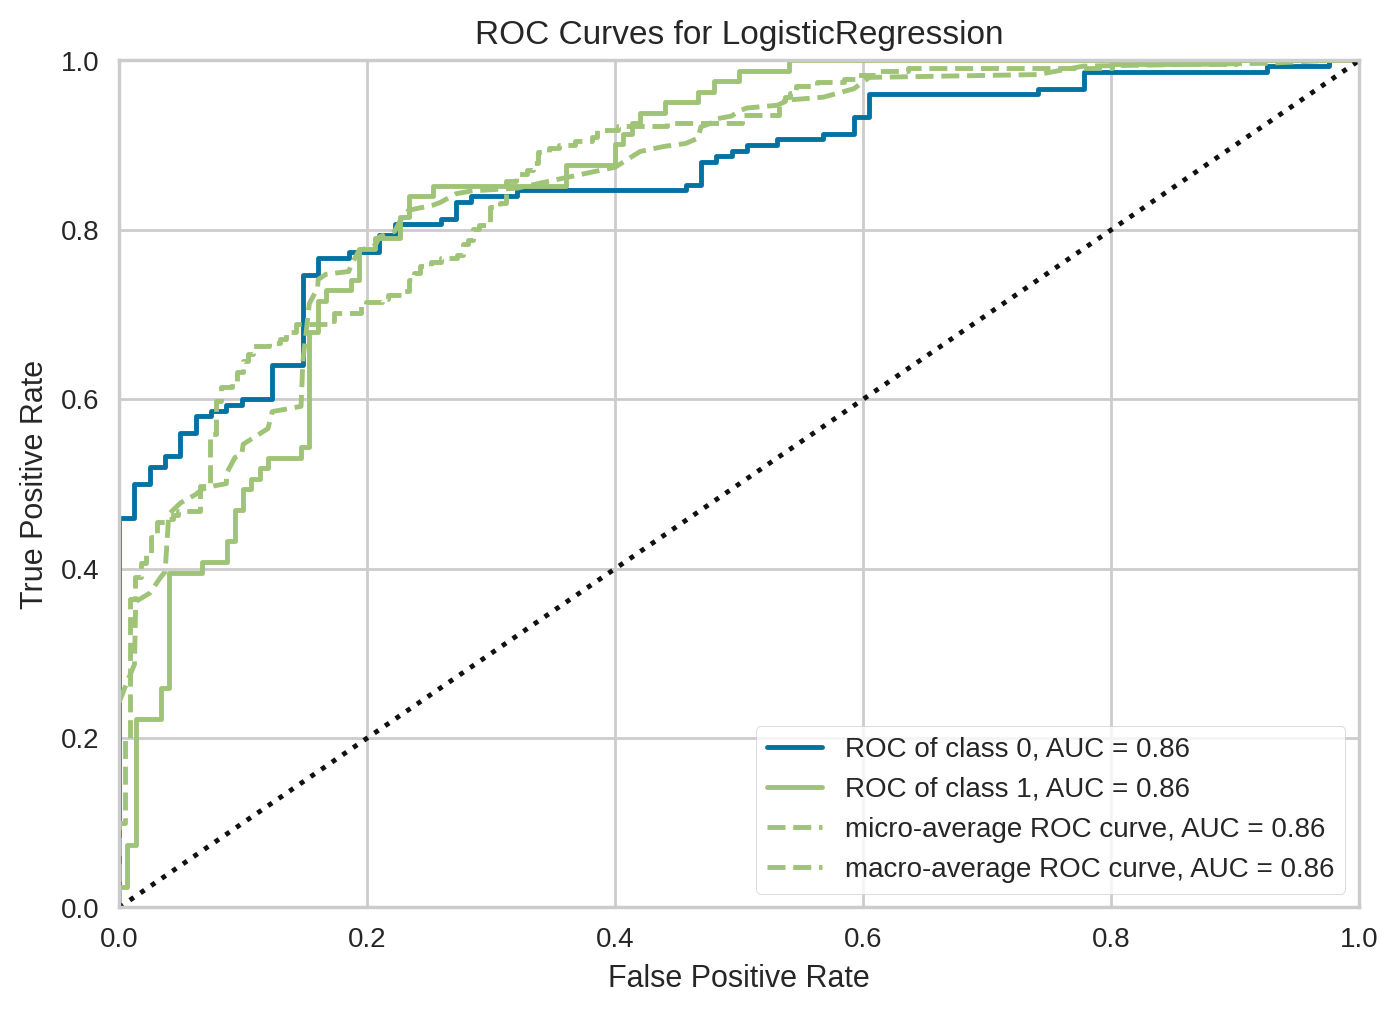

In [34]:
#ploting AUC
plot_model(best,plot='auc',scale=2)

# Plotting the feature importance. #
Feature importance refers to the technique used to determine the relative significance or contribution of each feature (input variable) in a machine learning model towards making accurate predictions or decisions. It helps identify which features have the most influence on the model's output or target variable.

Feature importance can be calculated using various methods depending on the type of model employed. Here are a few common techniques for assessing feature importance:

1. Coefficient Magnitudes: In linear models like linear regression or logistic regression, the magnitude of the coefficient assigned to each feature indicates its importance. Larger coefficient values suggest a stronger impact on the model's predictions.

2. Tree-Based Methods: Decision tree-based algorithms such as Random Forest or Gradient Boosting can provide feature importance scores. These methods calculate the total reduction in a certain criterion (e.g., Gini impurity or information gain) caused by each feature. Features with higher reductions are considered more important.

3. Permutation Importance: This technique involves shuffling the values of a single feature while keeping others unchanged and measuring the resulting decrease in model performance (e.g., accuracy or F1-score). The greater the performance decrease, the more important the feature is deemed.

4. Recursive Feature Elimination: It is an iterative method that starts with all features and recursively removes the least important ones. The importance of a feature can be estimated based on the order of elimination during the process.

5. LASSO (Least Absolute Shrinkage and Selection Operator): LASSO is a regularization technique that performs feature selection by shrinking the coefficients of less important features to zero. The non-zero coefficients indicate the important features.

The interpretation of feature importance can vary depending on the context and the specific model used. Important features are those that contribute the most to the model's predictive power or decision-making ability. They often provide valuable insights into the underlying relationships between the features and the target variable.

Feature importance is beneficial in several ways, including:

- Identifying the most influential factors: It helps to understand which features are most relevant in driving the model's predictions or outcomes.

- Feature selection: By focusing on the most important features, you can potentially simplify the model, reduce computation time, and improve interpretability.

- Feature engineering: Feature importance analysis can guide feature engineering efforts by highlighting the features that have the highest impact, thus allowing you to focus on enhancing or combining those features.

Overall, feature importance analysis is a valuable tool for understanding the relative significance of input features in a machine learning model and can assist in model interpretation, feature selection, and feature engineering tasks.

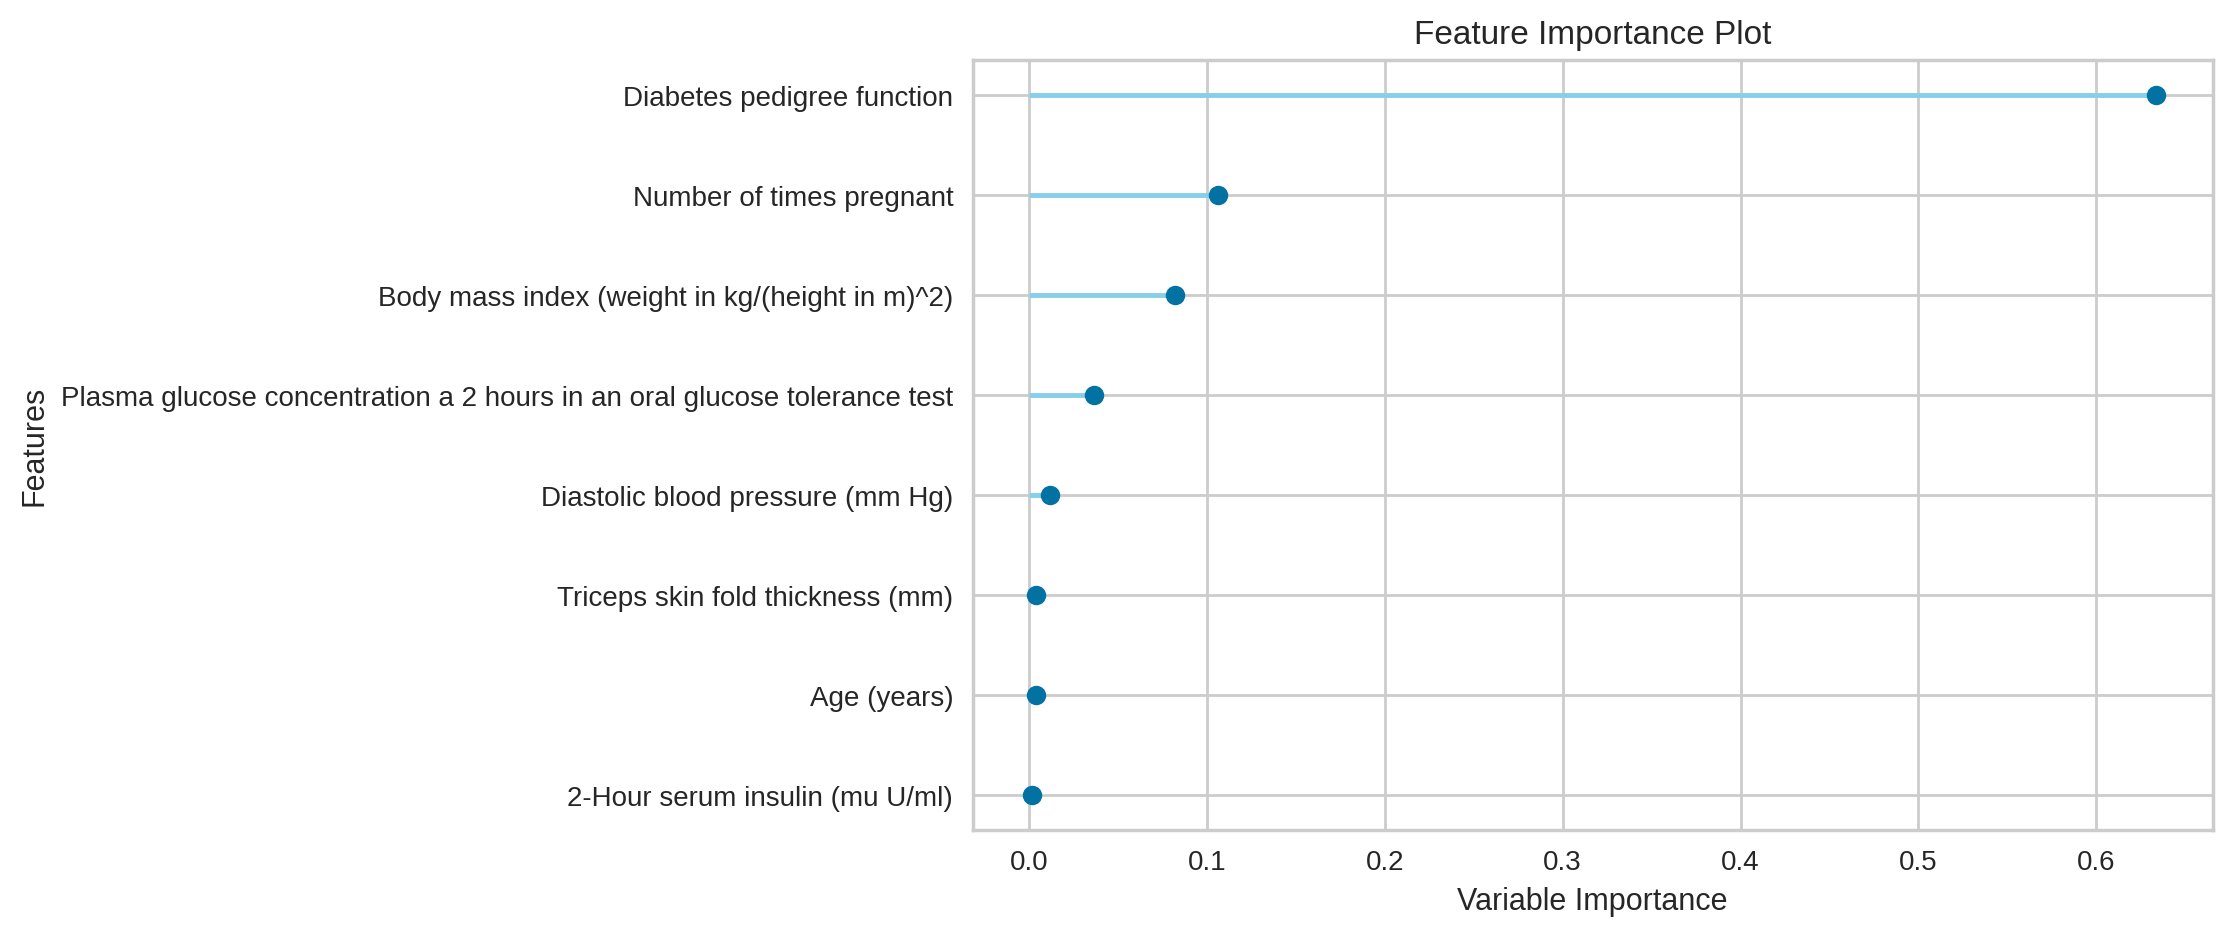

In [35]:
# Plot the feature importance.
# This plot allows us to know wich categorical value have the most importance on the output
plot_model(best,plot="feature",scale=2)

In [23]:
# Evalaute model allow to evaluete given all the others metrics.
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [24]:
# predict on the test set.
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8568,0.5309,0.7049,0.6056,0.4356,0.4447


In [25]:
#show prediction dataframe.
holdout_pred.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
552,6,114,88,0,0,27.799999,0.247,66,0,0,0.8037
438,1,97,70,15,0,18.200001,0.147,21,0,0,0.9648
149,2,90,70,17,0,27.299999,0.085,22,0,0,0.9394
373,2,105,58,40,94,34.900002,0.225,25,0,0,0.7999
36,11,138,76,0,0,33.200001,0.420,35,0,1,0.6393


In [27]:
# We will try to perform the text on  the training dataset without the label.
new_data = c_data.copy()
new_data.drop('Class variable', axis=1, inplace=True)
new_data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [28]:
# Predict model on new data .
predictions = predict_model(best,data=new_data)
predictions.head()
# The models is workign fine so we will proceed to save it on disc.

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,0.6940
1,1,85,66,29,0,26.600000,0.351,31,0,0.9419
2,8,183,64,0,0,23.299999,0.672,32,1,0.7976
3,1,89,66,23,94,28.100000,0.167,21,0,0.9454
4,0,137,40,35,168,43.099998,2.288,33,1,0.8394


In [29]:
save_model(best,'diabetes_prediction_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanC

In [31]:
# Once the model is saved we will proceed to load the pipeline .
loaded_best_pipeline = load_model('models/diabetes_prediction_model')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body mass index (weight in '
                                             'kg/(height in m)^2)',
                                             'Diab...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)